In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams.update({'font.size': 22})

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
cabling_map = np.array([2,18,3,19,4,20,5,21,6,22,7,23,8,24,9,25,10,26,11,27,12,28,13,29,14,30,15,31,16,32])-3

In [5]:
def peak_info(n, event_to_read=0): 
#finds amplitudes for all events in file_name, (waven.txt)   
    
    f  = open("raw_waves_1500/wave"+str(n)+".txt", 'r') 
    f1 = f.readlines()     
    
    event=0
    list_of_values = [] 
    
    for line in f1: 
        if line.startswith("Record") and event!=event_to_read:
            if event<event_to_read:
                event=event+1
                continue
            else:
                break
        if event==event_to_read:
            try: 
                list_of_values.append(np.short(line))

            except ValueError:  
#                 break
                if line.startswith("Record") and len(list_of_values) > 0:
                    event=event+1

                    if event%1000==0:
                        print("Processed "+str(event)+" events from waveform "+str(n))

#         if len(list_of_values)>250000: break

    return np.array(list_of_values, dtype=np.short)

def read_all_waveforms(event_to_read=0):

    waveforms = np.ndarray(shape=(30, len(peak_info(0, event_to_read=event_to_read))))
    for n in range(30):
        waveforms[n] = peak_info(n, event_to_read=event_to_read)

    return waveforms

def plot_event(event=0):

    wf = read_all_waveforms(event_to_read=event)

    wf_rearranged = np.ndarray((wf.shape[0]-1, wf.shape[1]))
    for i in range(wf.shape[0]):
        if cabling_map[i]==14: continue
        wf_rearranged[cabling_map[i] - (1 if cabling_map[i]>14 else 0),:] = wf[i,:]

    plt.figure(figsize=(50,15))
    plt.pcolor(wf_rearranged[:,:15000], norm=matplotlib.colors.Normalize(vmin=3000), cmap='binary_r')
    plt.colorbar(label='ADC')
    plt.ylabel('strip #')
    plt.xlabel('TDC')
    plt.title('Event #%d'%event)
    plt.show()

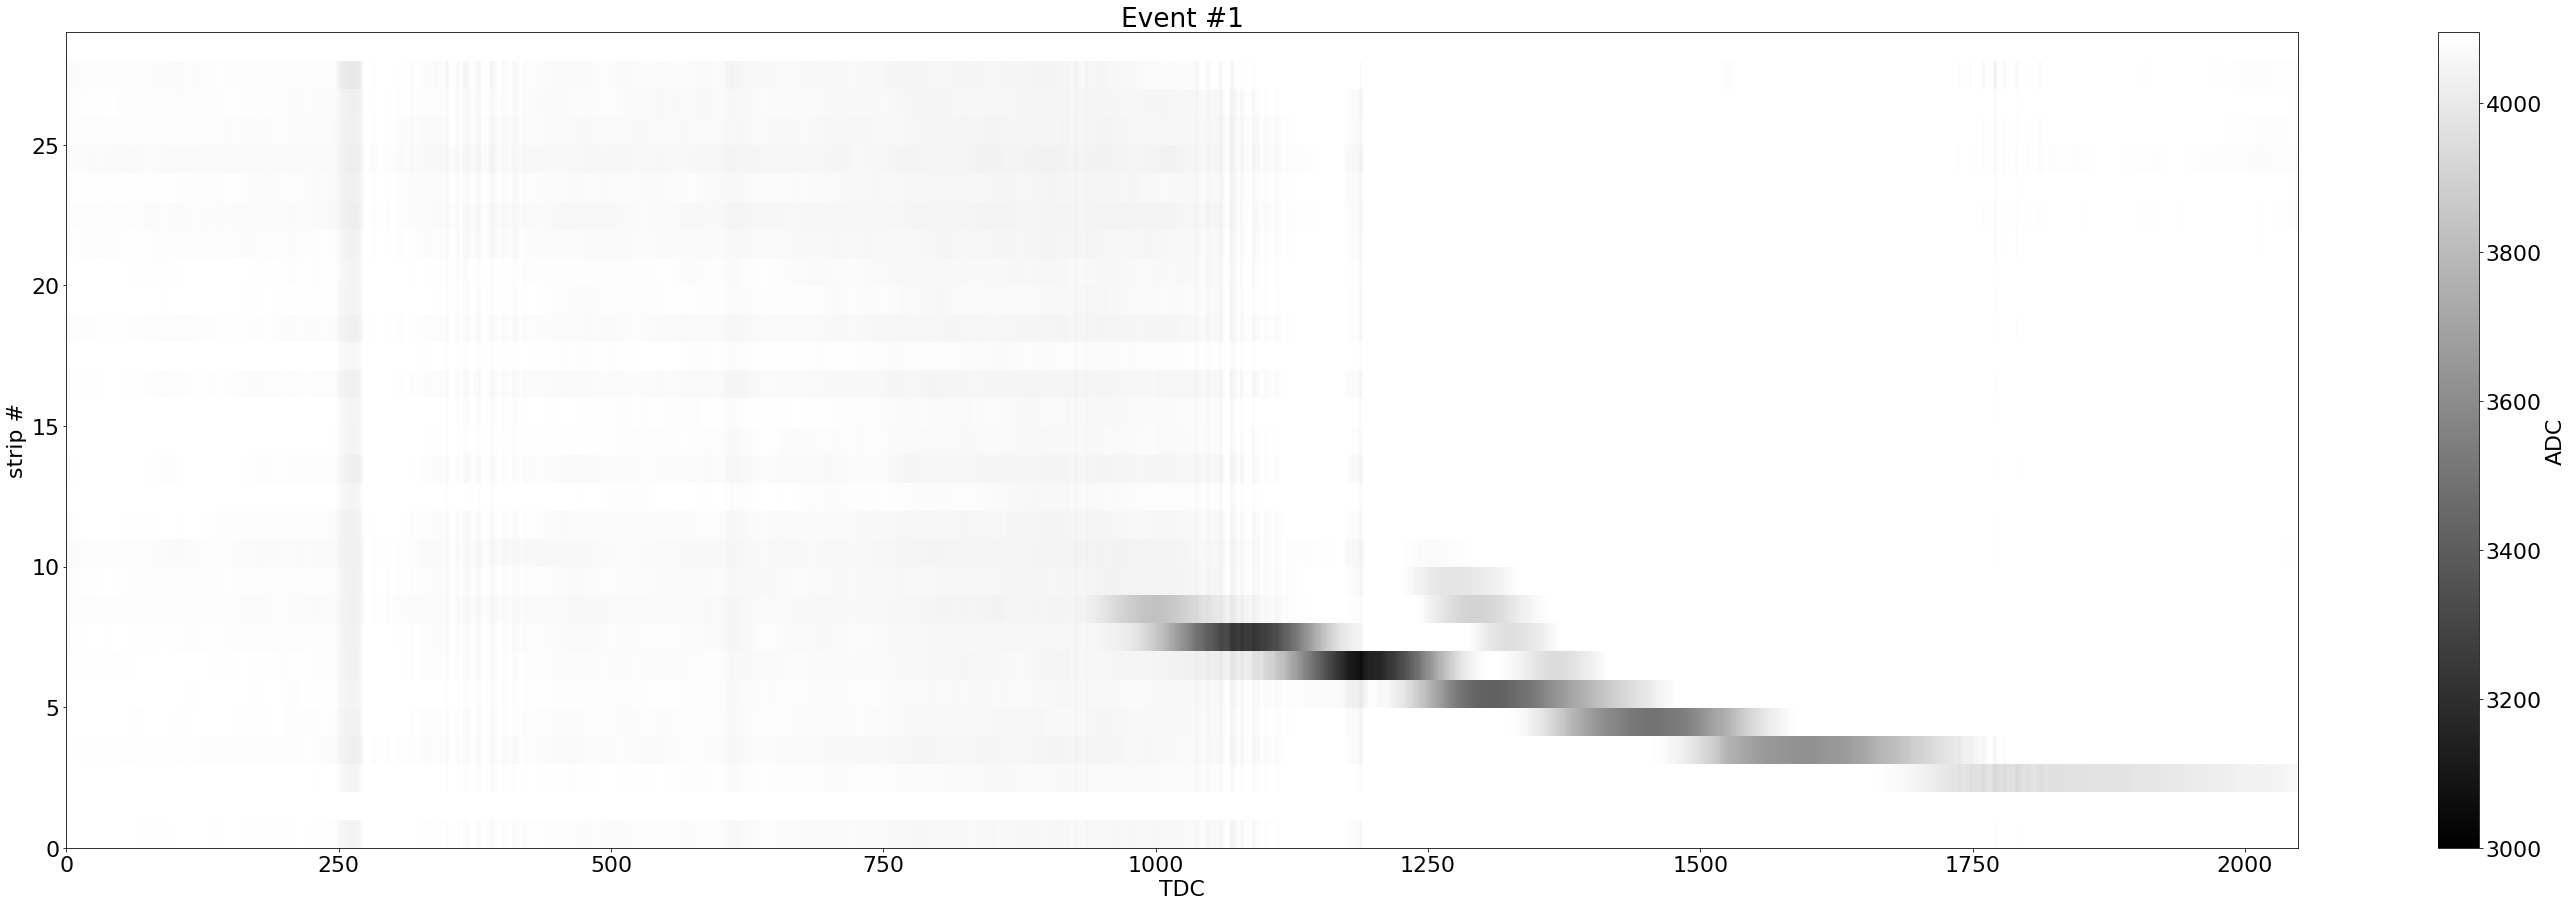

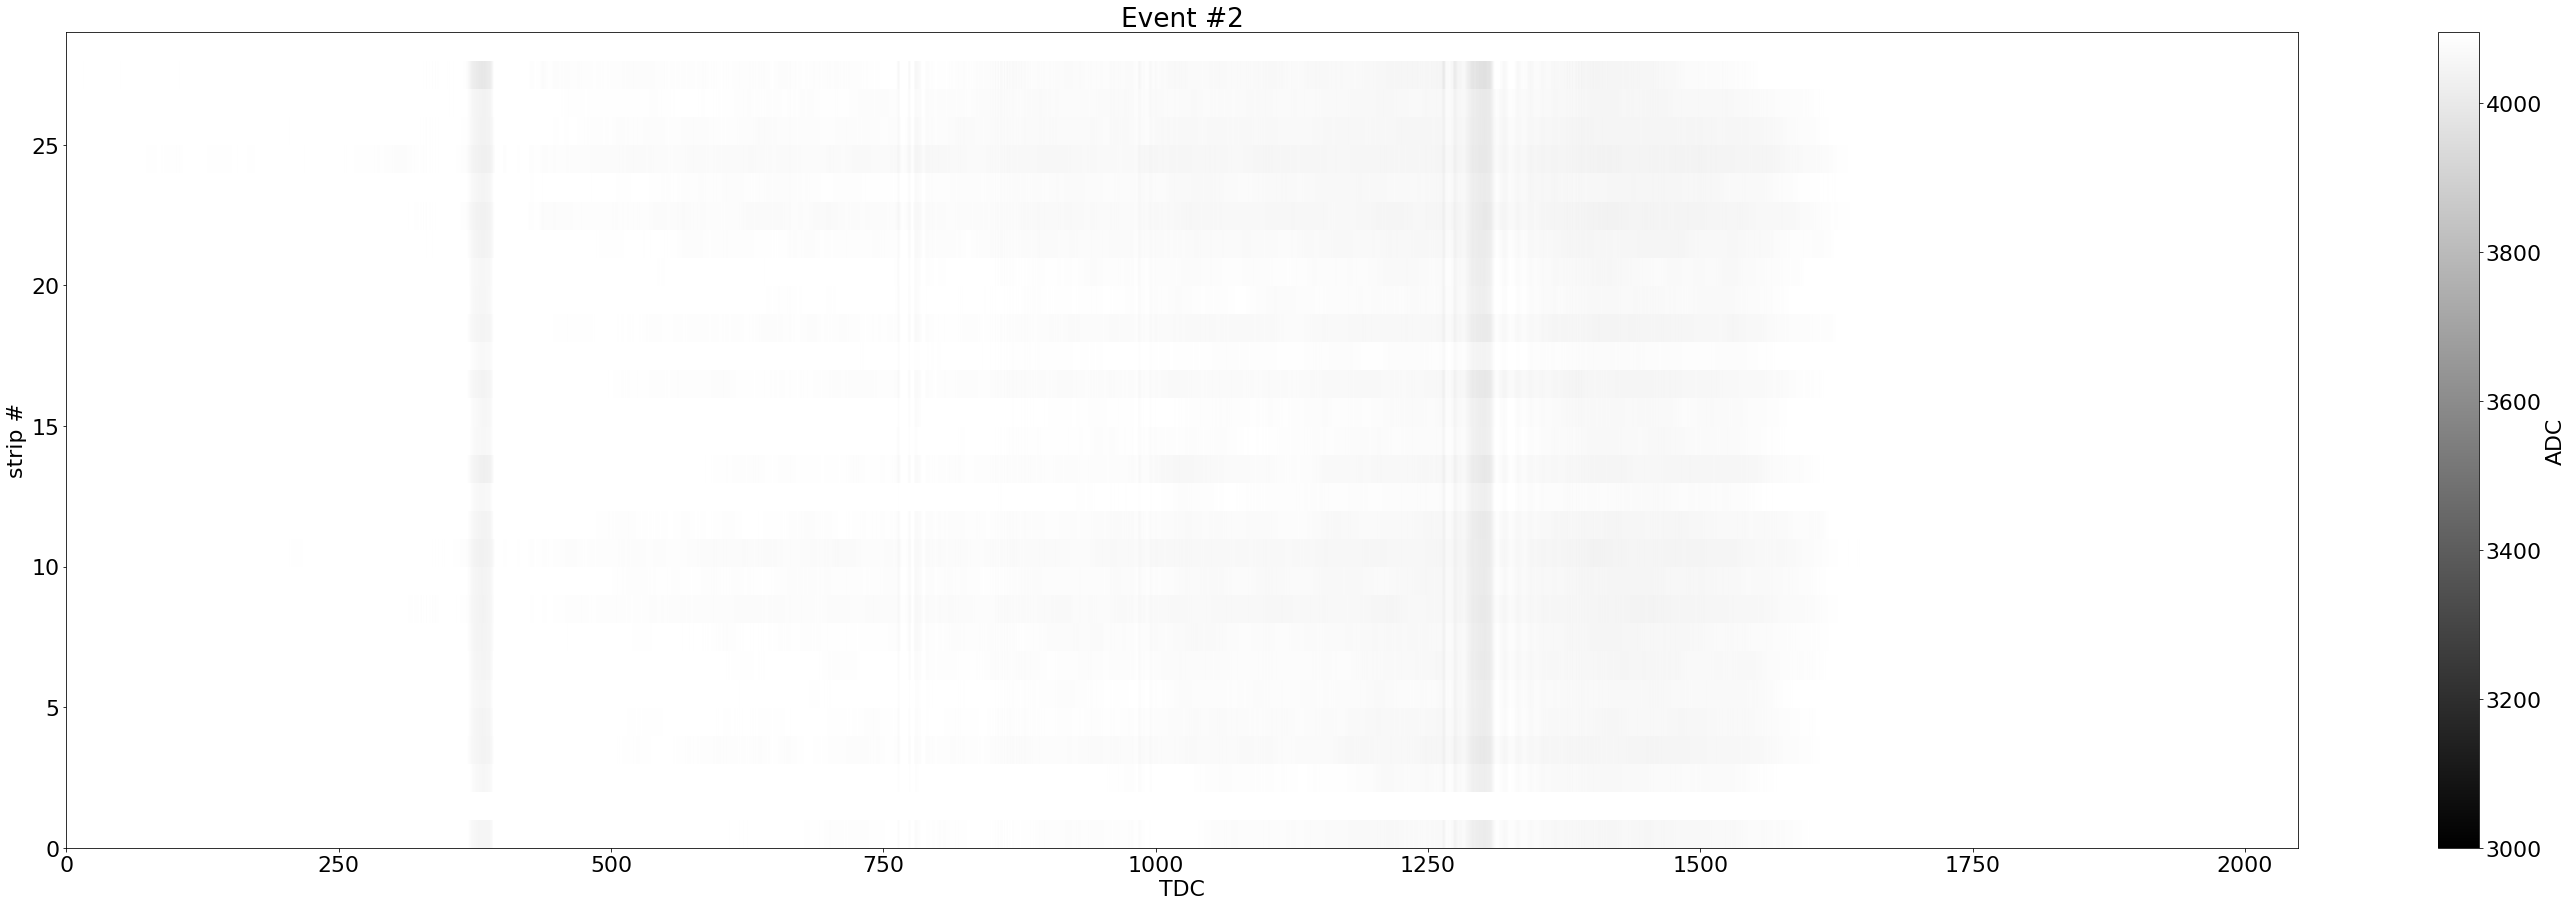

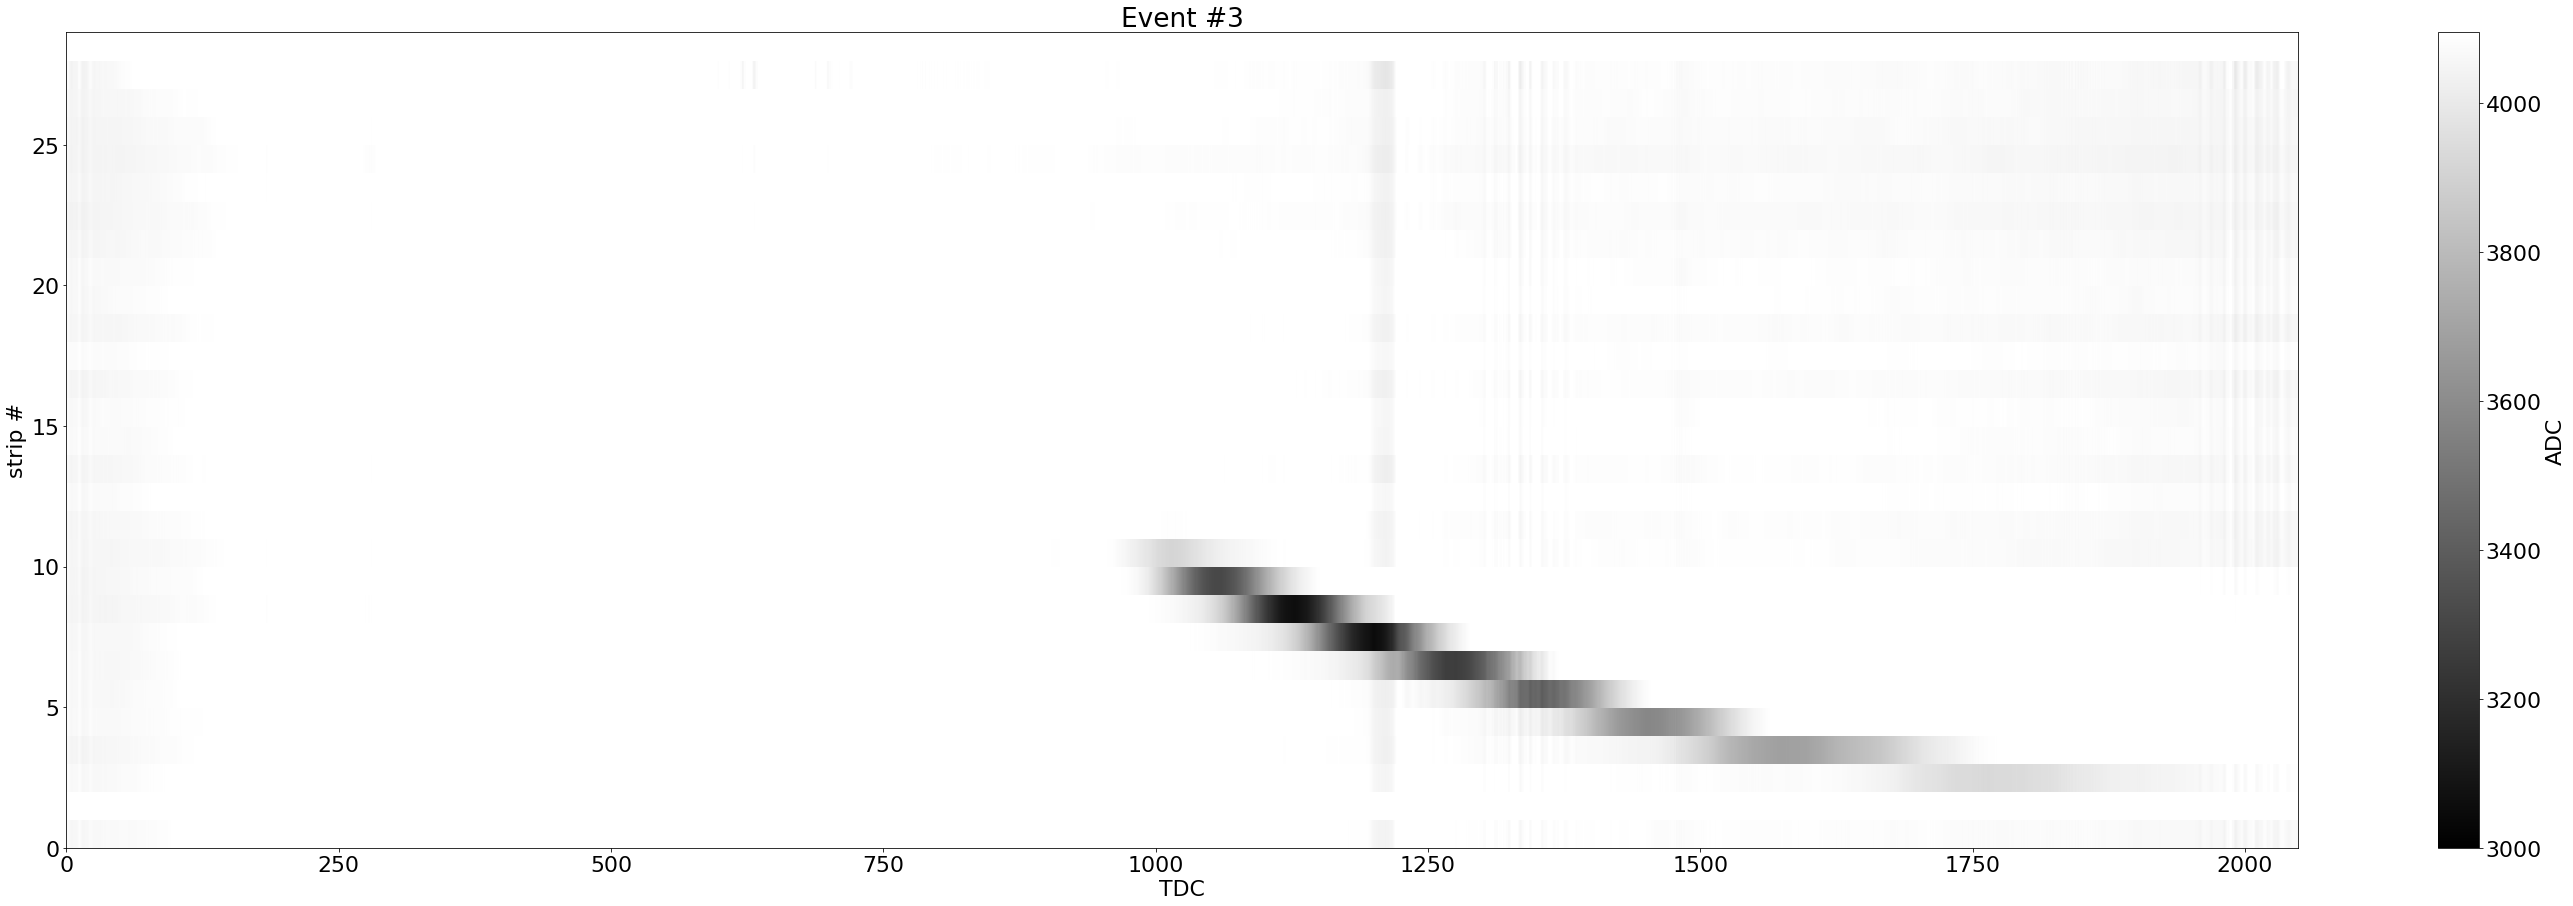

In [ ]:
for i in range(1,10):
    plot_event(event=i)

In [19]:
wf = read_all_waveforms()

In [20]:
wf.shape

(30, 2049)

In [21]:
cabling_map = np.array([2,18,3,19,4,20,5,21,6,22,7,23,8,24,9,25,10,26,11,27,12,28,13,29,14,30,15,31,16,32])-3

In [22]:
wf_rearranged = np.ndarray((wf.shape[0]-1, wf.shape[1]))
for i in range(wf.shape[0]):
    if cabling_map[i]==14: continue
    wf_rearranged[cabling_map[i] - (1 if cabling_map[i]>14 else 0),:] = wf[i,:]

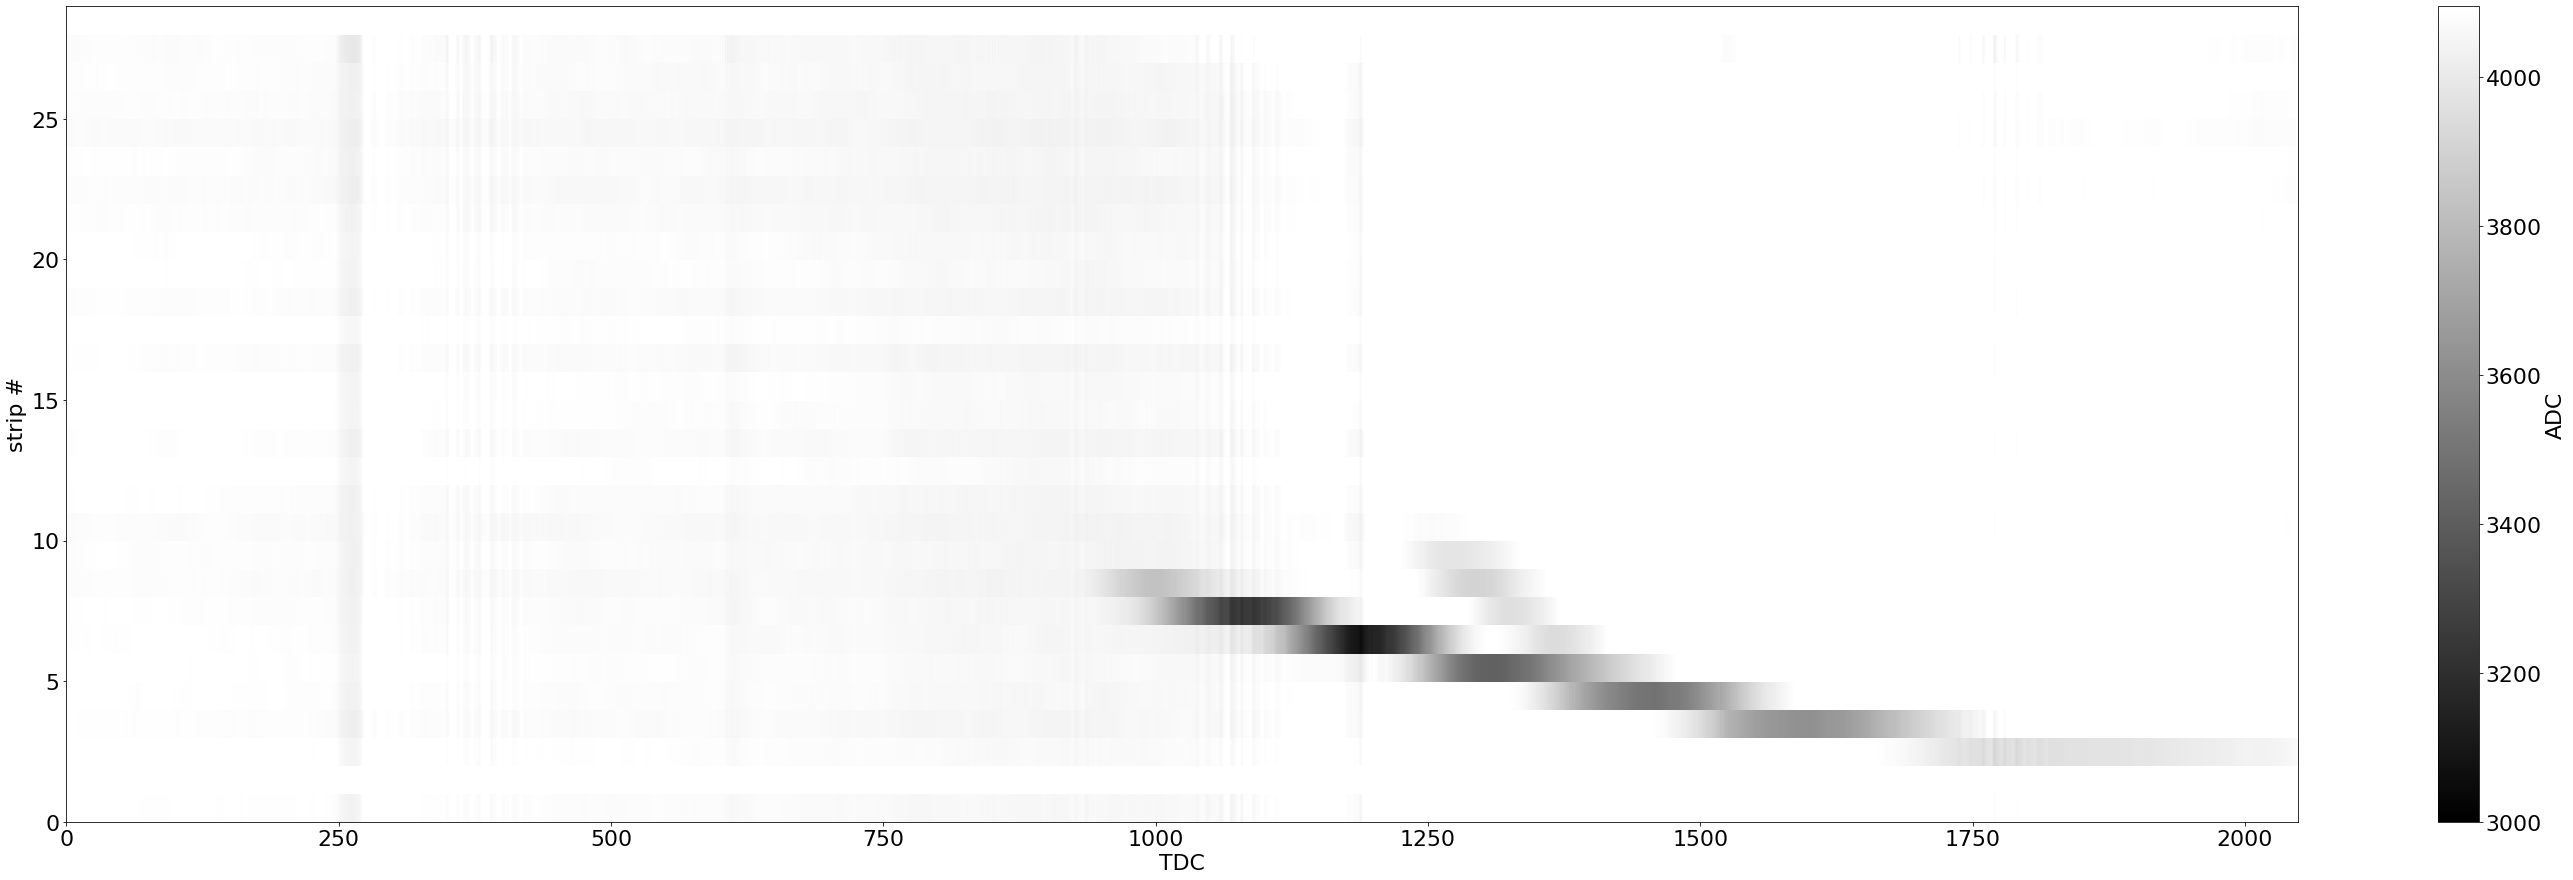

In [23]:
plt.figure(figsize=(50,15))
plt.pcolor(wf_rearranged[:,:15000], norm=matplotlib.colors.Normalize(vmin=3000), cmap='binary_r')
plt.colorbar(label='ADC')
plt.ylabel('strip #')
plt.xlabel('TDC')
plt.show()

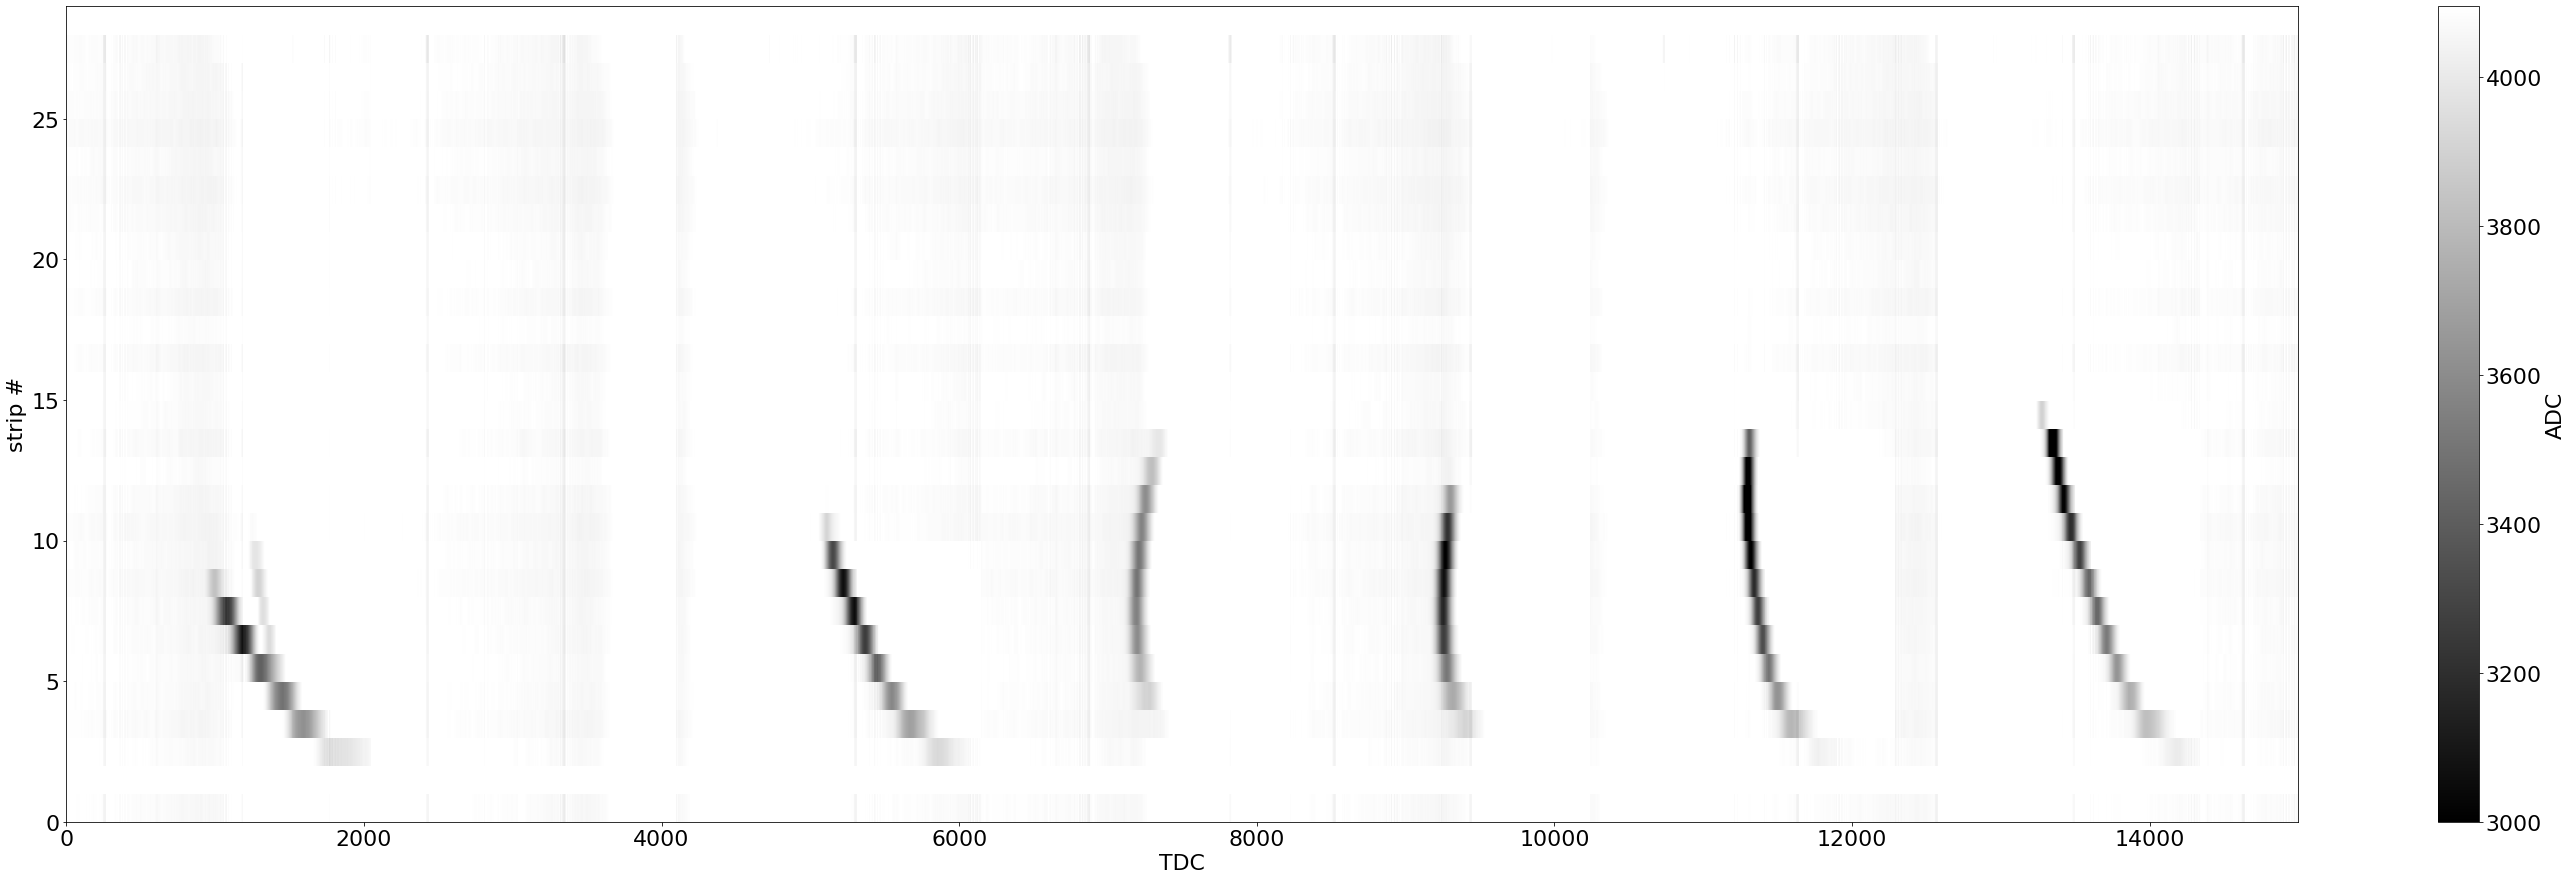

In [16]:
plt.figure(figsize=(50,15))
plt.pcolor(wf_rearranged[:,:15000], norm=matplotlib.colors.Normalize(vmin=3000), cmap='binary_r')
plt.colorbar(label='ADC')
plt.ylabel('strip #')
plt.xlabel('TDC')
plt.show()

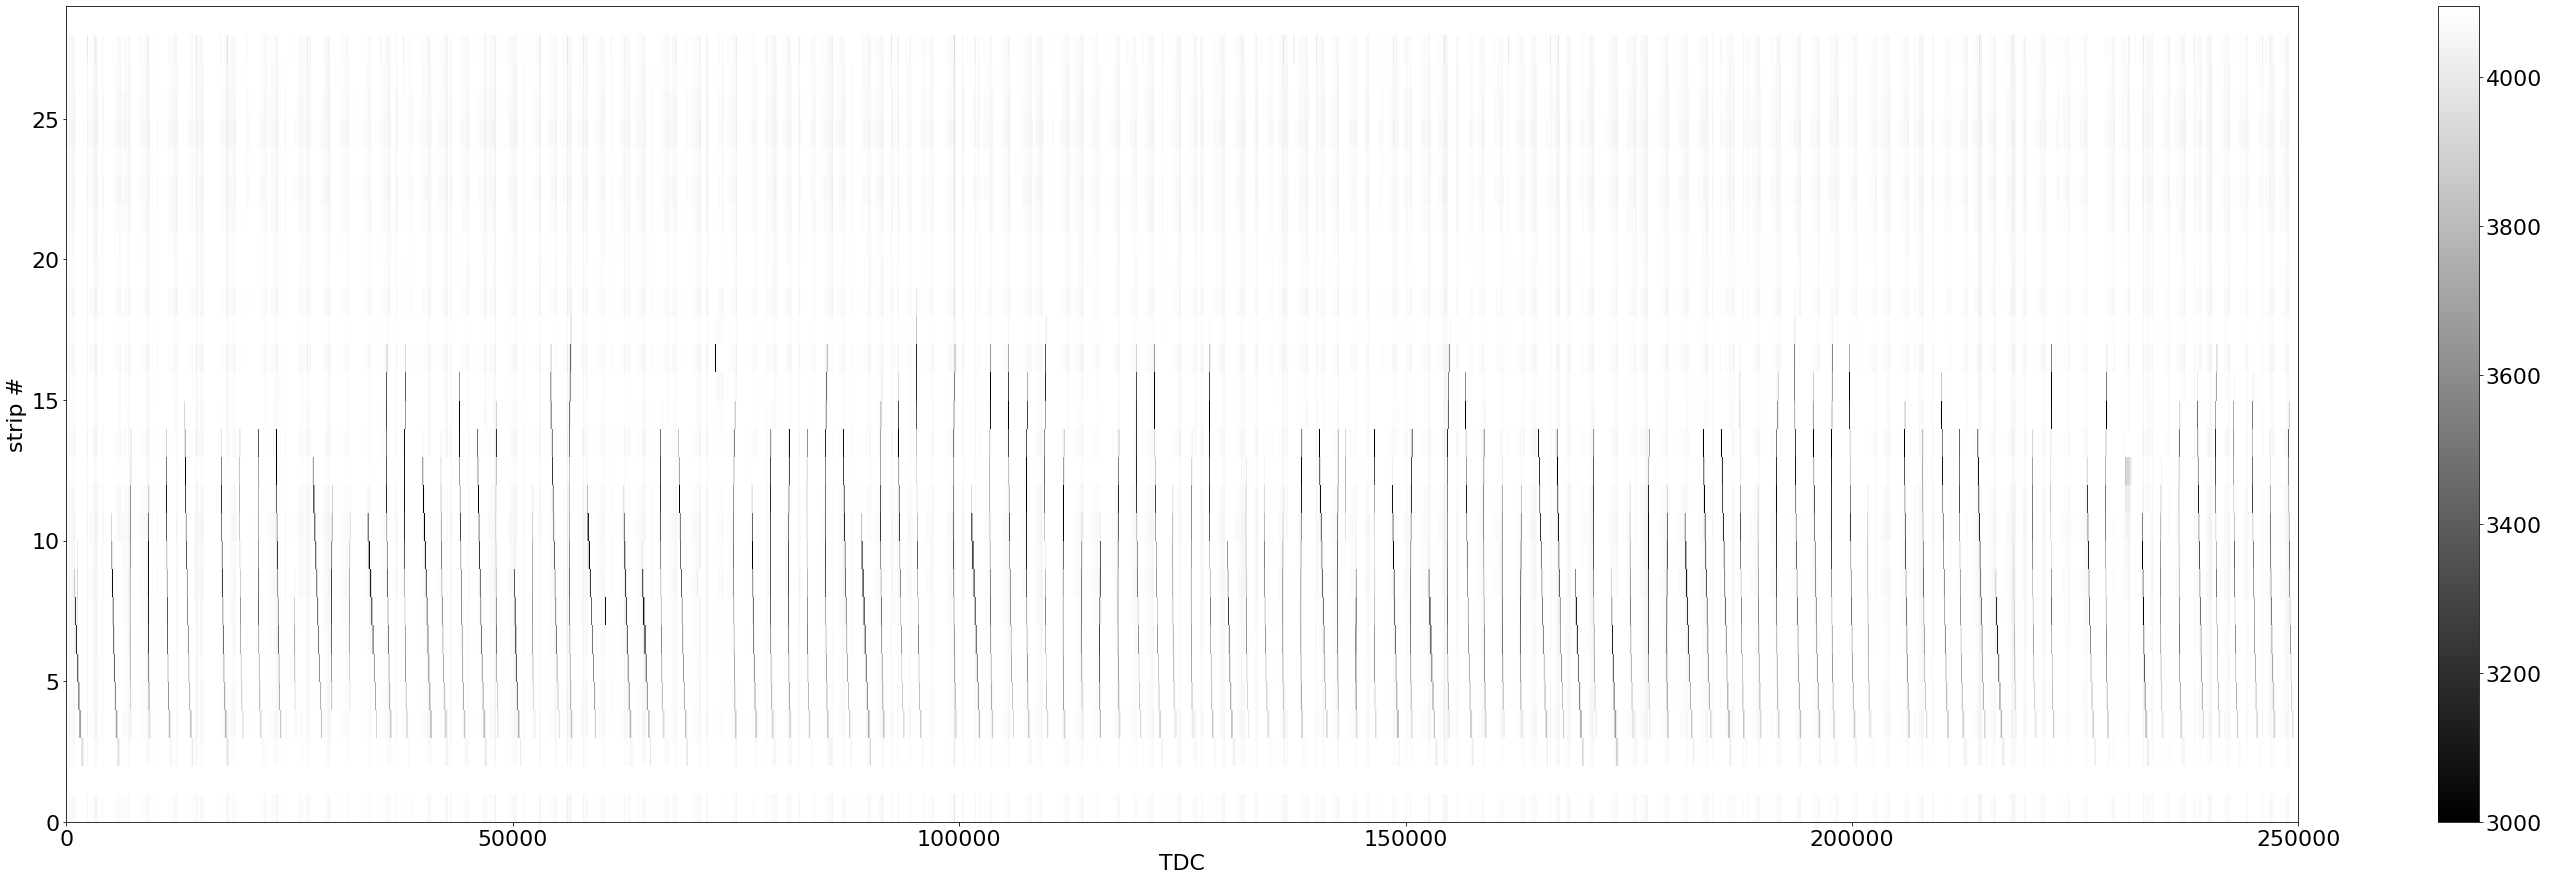

In [17]:
plt.figure(figsize=(50,15))
plt.pcolor(wf_rearranged, norm=matplotlib.colors.Normalize(vmin=3000), cmap='binary_r')
plt.colorbar()
plt.ylabel('strip #')
plt.xlabel('TDC')
plt.show()

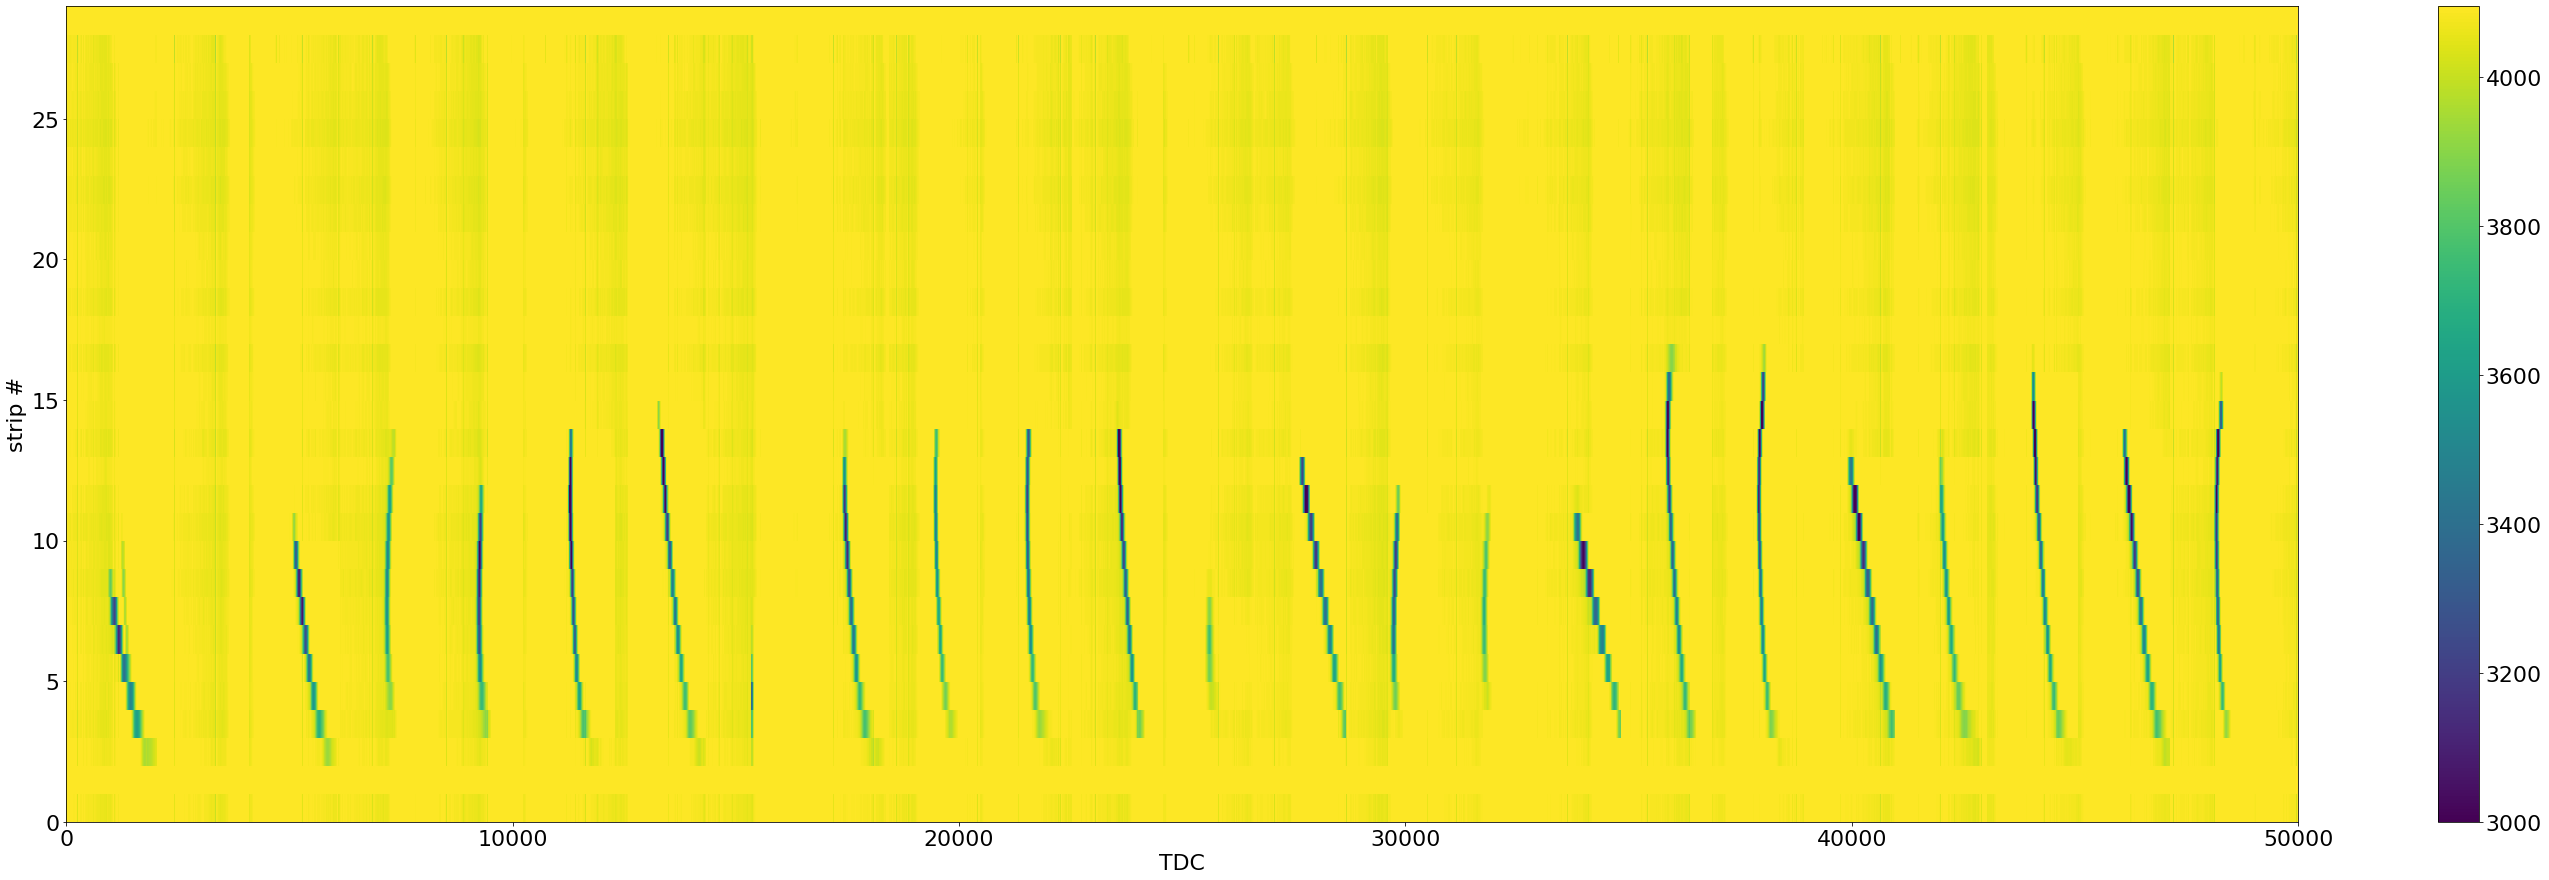

In [10]:
plt.figure(figsize=(50,15))
plt.pcolor(wf_rearranged, norm=matplotlib.colors.Normalize(vmin=3000))
plt.colorbar()
plt.ylabel('strip #')
plt.xlabel('TDC')
plt.show()

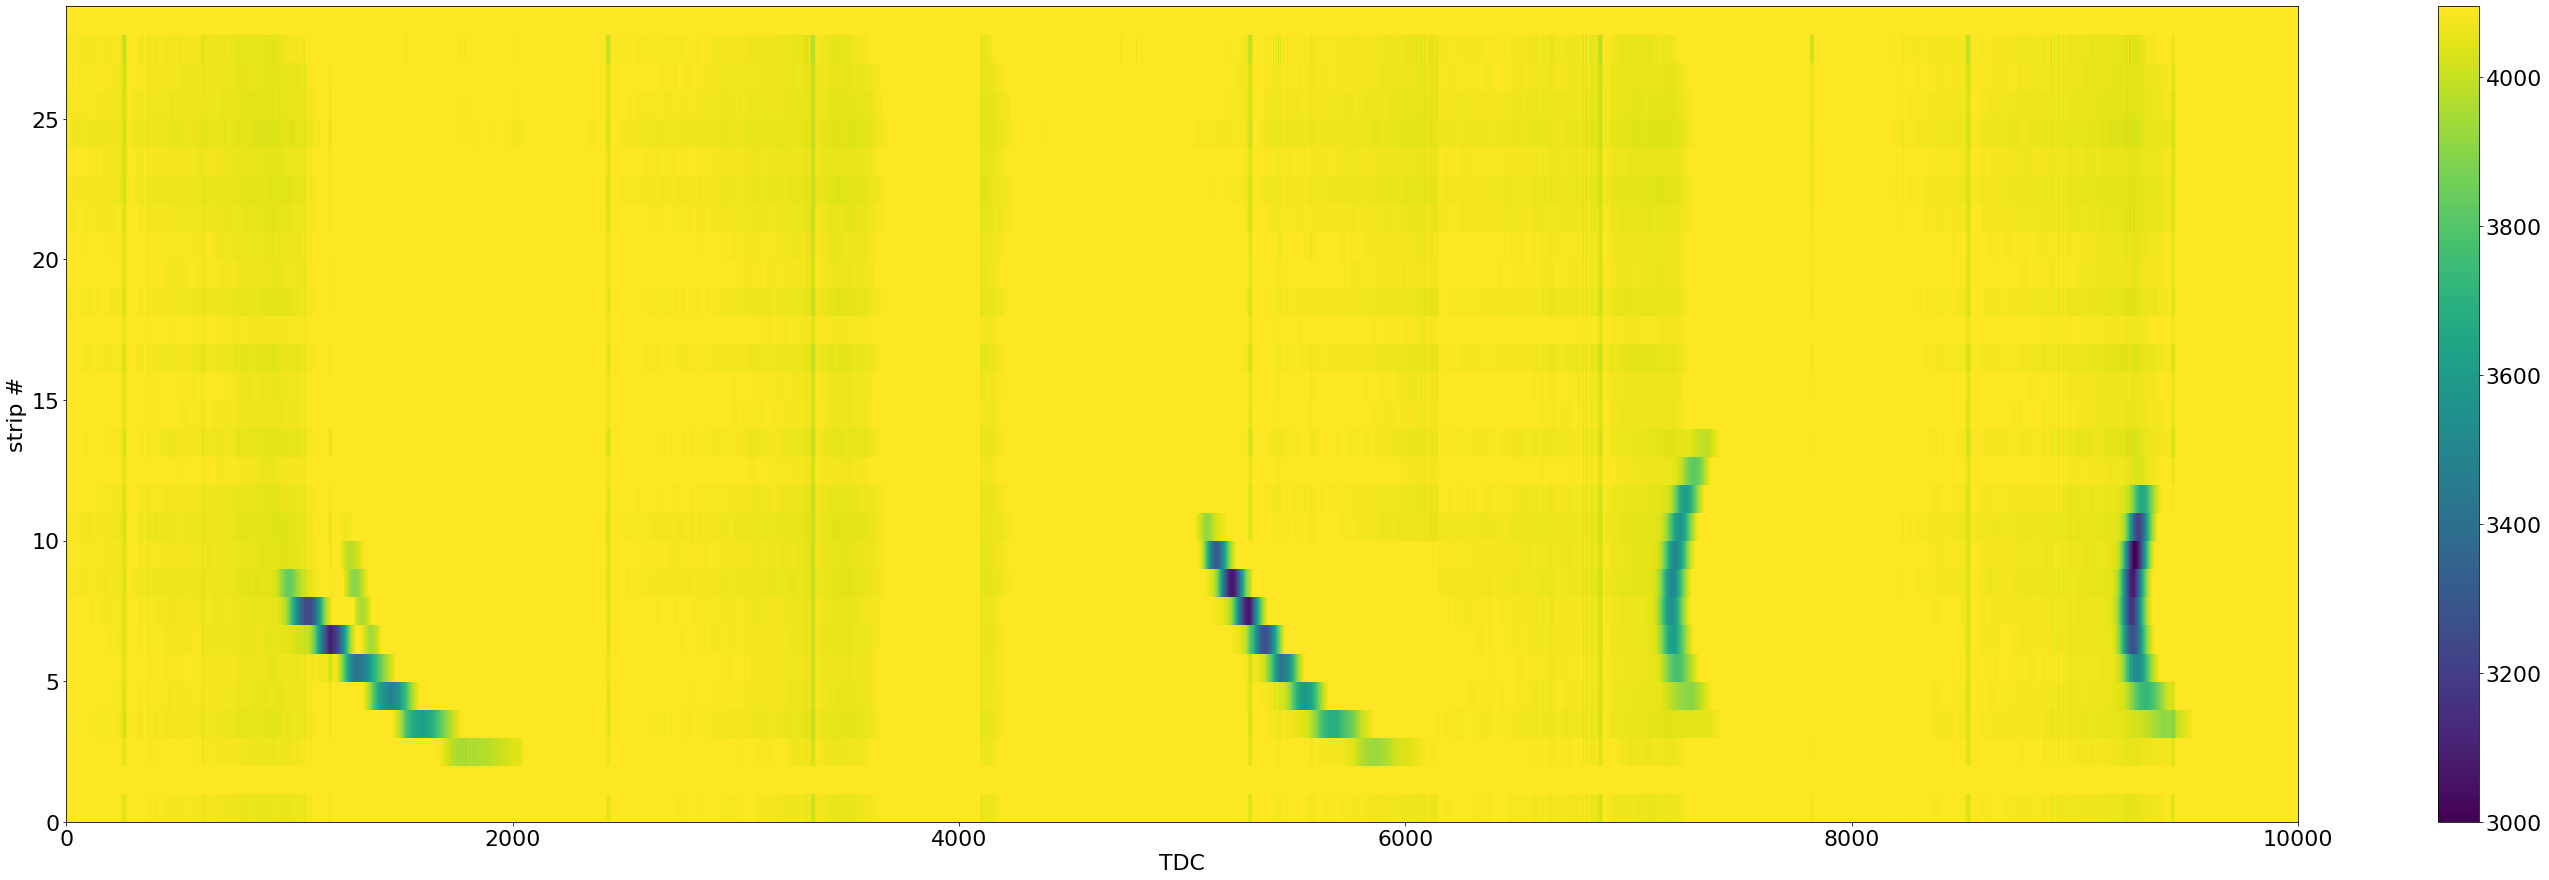

In [21]:
plt.figure(figsize=(50,15))
plt.pcolor(wf_rearranged, norm=matplotlib.colors.Normalize(vmin=3000))
plt.colorbar()
plt.ylabel('strip #')
plt.xlabel('TDC')
plt.show()

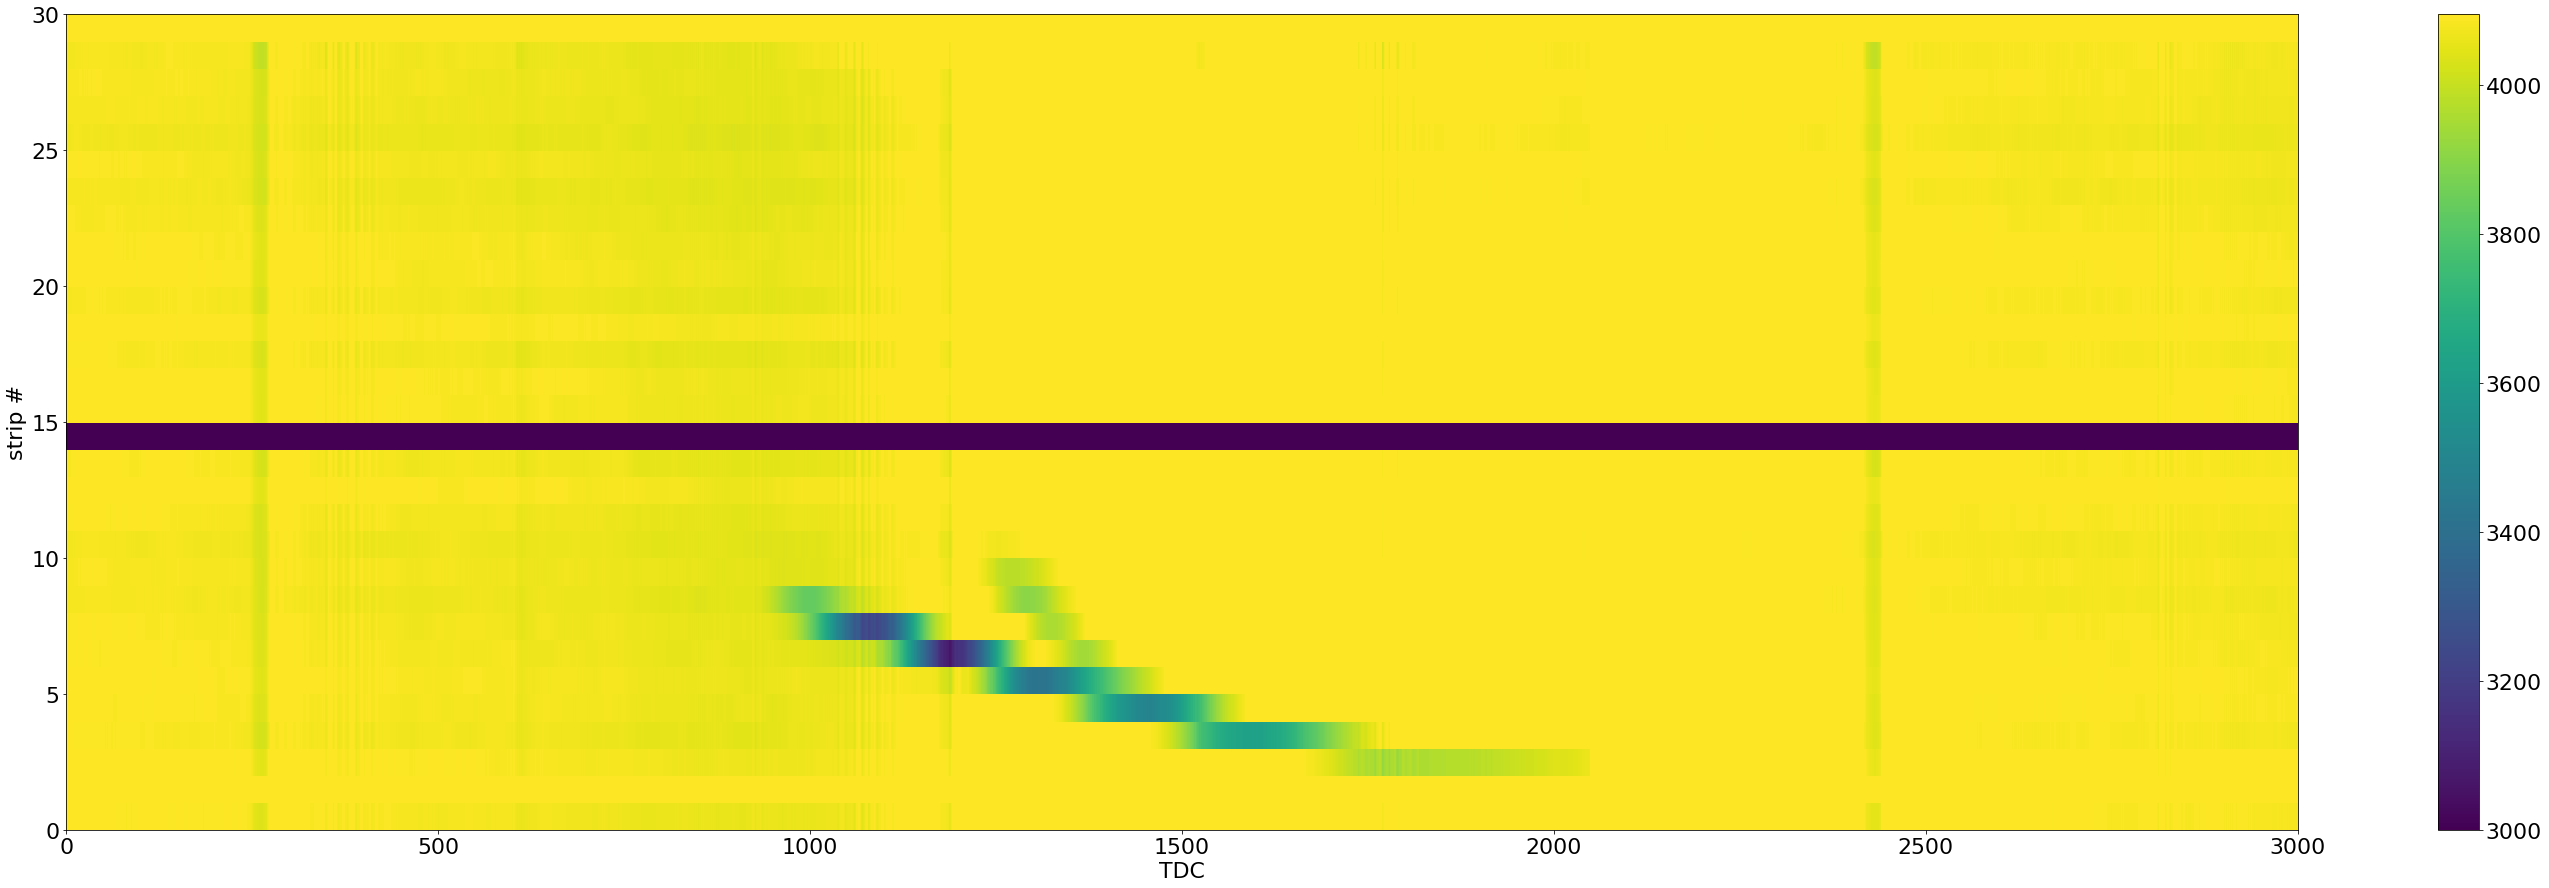

In [24]:
plt.figure(figsize=(50,15))
plt.pcolor(wf_rearranged, norm=matplotlib.colors.Normalize(vmin=3000))
plt.colorbar()
plt.ylabel('strip #')
plt.xlabel('TDC')
plt.show()

In [16]:
wf_rearranged[cabling_map[i],:]

IndexError: index 30 is out of bounds for axis 0 with size 30

In [30]:
cabling_map[i]

IndexError: index 30 is out of bounds for axis 0 with size 30

In [28]:
wf_rearranged.shape

(32, 1001)

In [26]:
wf[0]

array([4090., 4090., 4090., ..., 4062., 4063., 4060.])

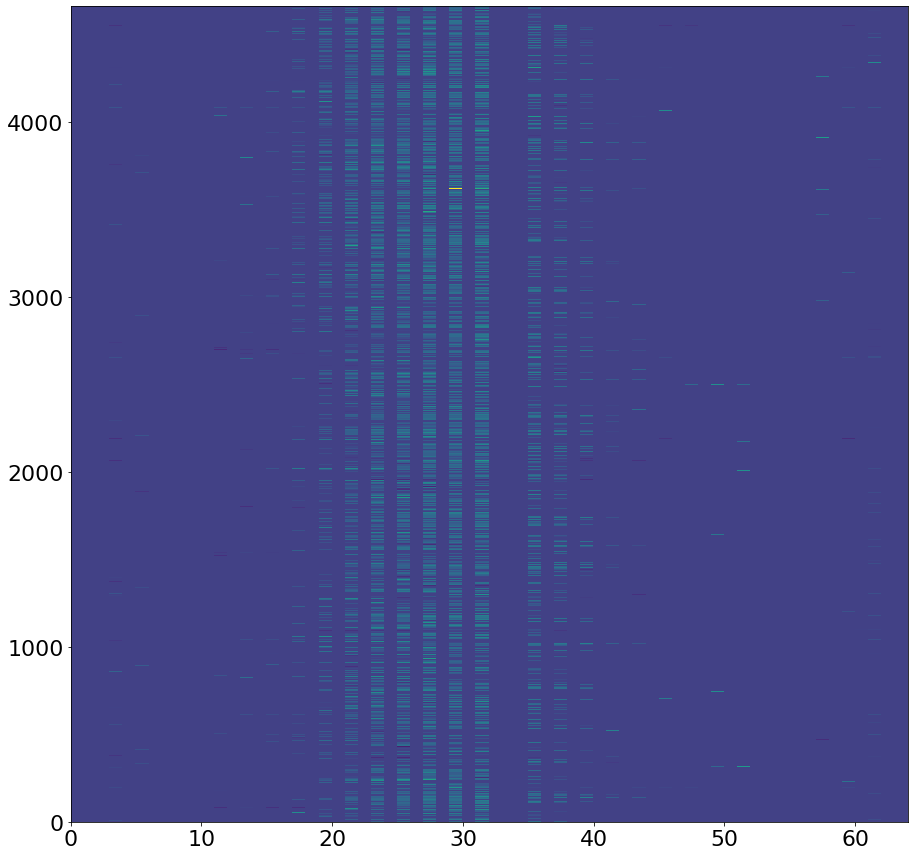

In [9]:
plt.figure(figsize=(15,15))
plt.pcolor(t)